# Tech Challenge - Fase 1

**Objetivo:** Modelo preditivo treinado para câncer malignos em pacientes.

**Processos:** Carregar dataset, análisar e explorar dados, tratar dados, separar dados, treinar modelo, avaliar modelo

## Dataset

**Breast Câncer Dataset**
- Colunas numéricas traduzidas de imagens de tumores em câncer de mama.
- Nossa target é a coluna `diagnosis`, com dois valores: `M (Maligno)` e `B (Benigno)`

- Como é visualmente uma massa tumoral mamaria: 

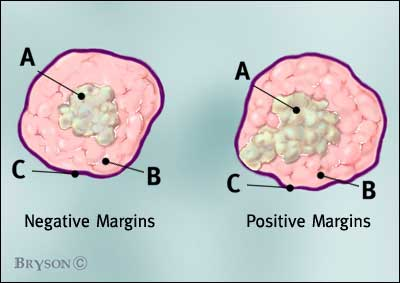

## Carregamento do Dataset

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/data.csv")
df = pd.DataFrame(df)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [221]:
df.shape

(569, 33)

In [222]:
df.diagnosis.unique()
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [223]:
df[df.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


## Tratando e explorando dados
- Removendo dados desnecessários e mapeando dados string

In [224]:
df = df.drop(['id','Unnamed: 32'],axis=1)
df['diagnosis']=df['diagnosis'].map({'B':0, 'M':1})
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [225]:
print(f'Quantidade dados nulos: {df.isnull().sum().sum()}')
df.info(show_counts=True)

Quantidade dados nulos: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  

In [226]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [227]:
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [228]:
features_mean= list(df.columns[1:11]) # media
features_se= list(df.columns[11:20]) # desvio padrao
features_worst=list(df.columns[21:31]) # piores casos

print("========================================================================")
print(f'Média: {features_mean}')
print("========================================================================")
print(f'Desvio Padrão: {features_se}')
print("========================================================================")
print(f'Piores casos: {features_worst}')
print("========================================================================")

Média: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
Desvio Padrão: ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
Piores casos: ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Análise dos gráficos

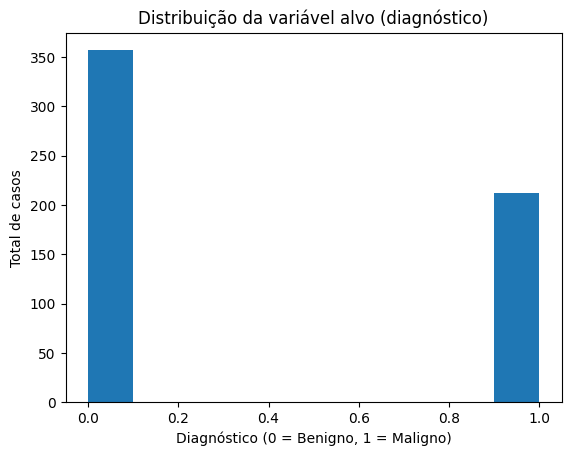

diagnosis
0    357
1    212
Name: count, dtype: int64

In [229]:
plt.hist(df['diagnosis'])
plt.title('Distribuição da variável alvo (diagnóstico)')
plt.xlabel('Diagnóstico (0 = Benigno, 1 = Maligno)')
plt.ylabel('Total de casos')
plt.show()
df['diagnosis'].value_counts()


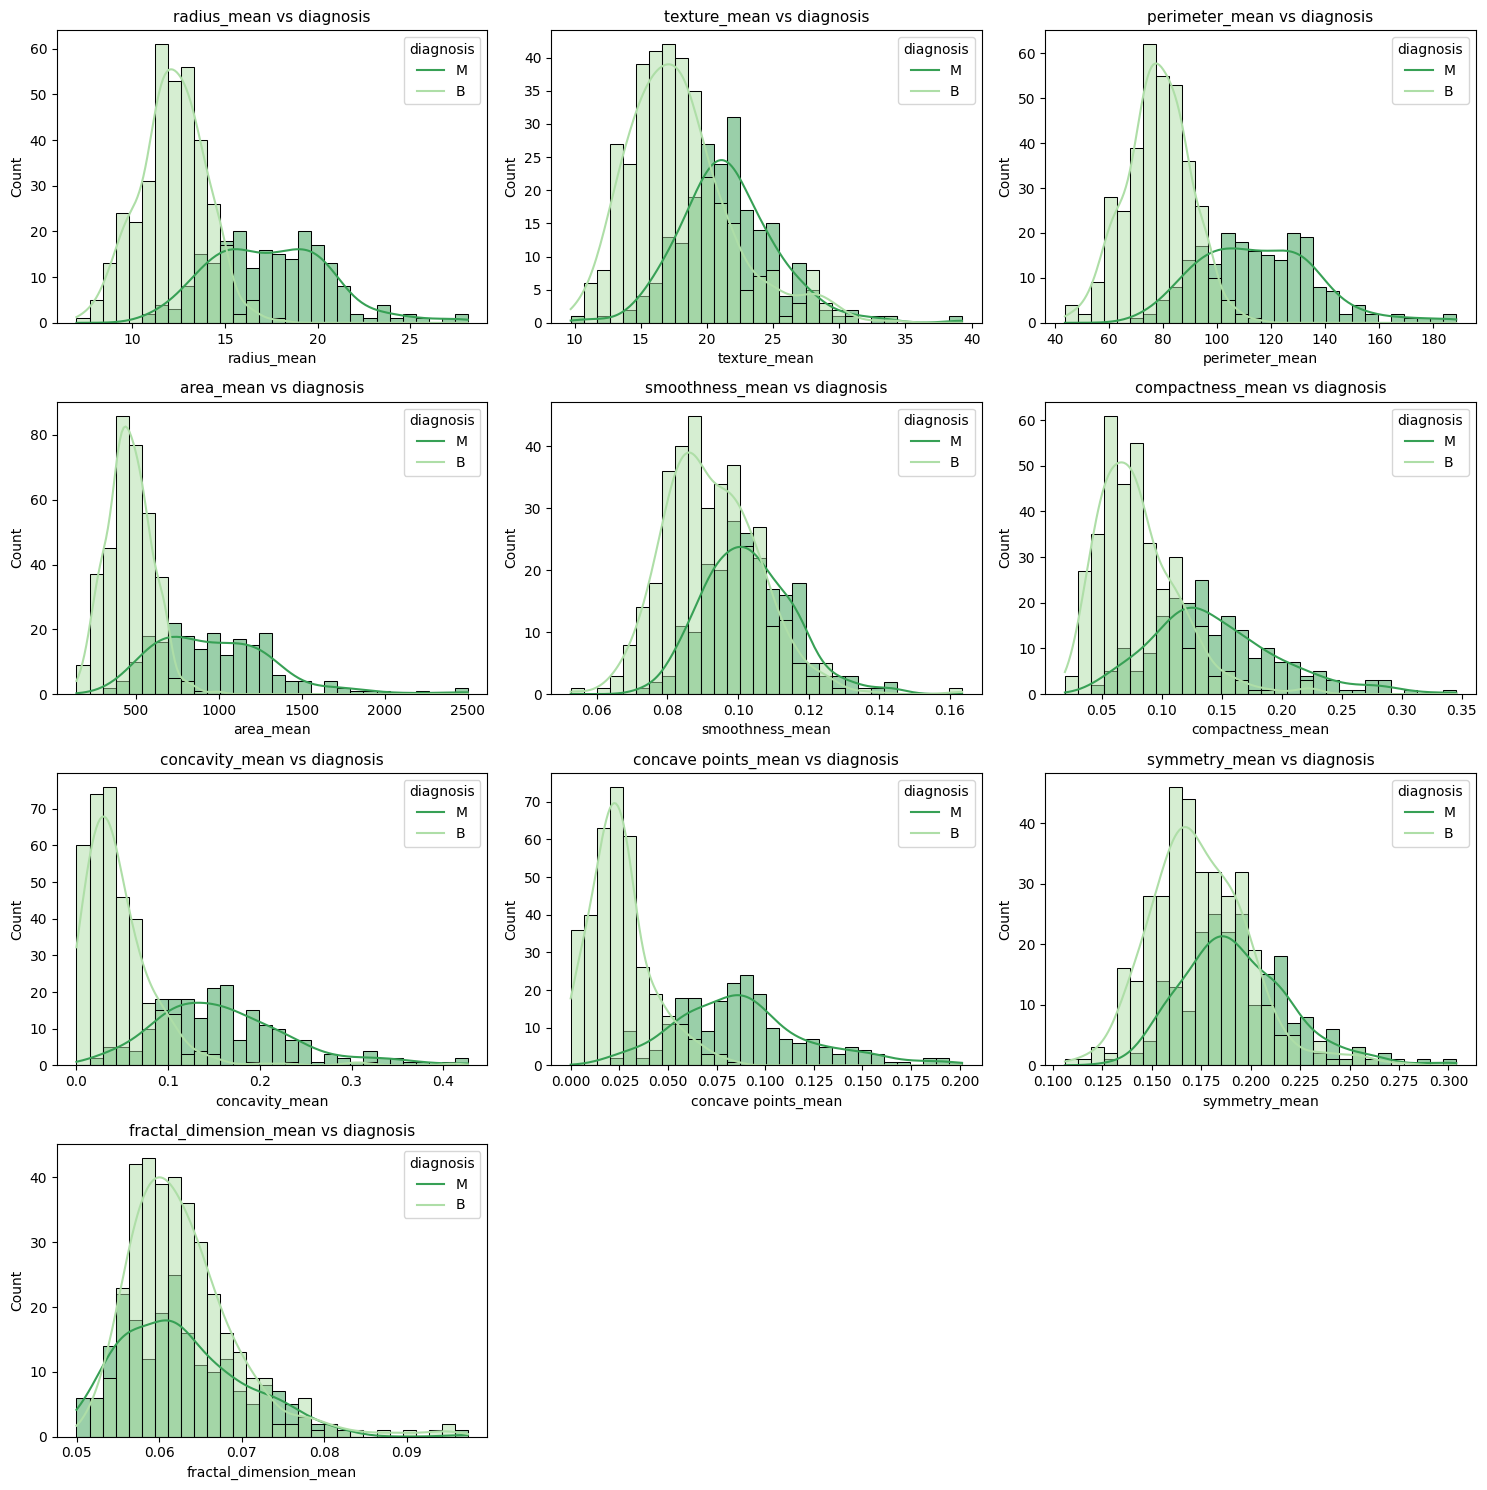

In [230]:
# features = df.drop('diagnosis', axis=1) # todas as colunas exceto a target
features = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']] # todas as colunas exceto a target

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    sns.histplot(data=df, x=col, hue='diagnosis', kde=True, ax=ax, palette='Greens', bins=30)

    ax.set_title(f'{col} vs diagnosis', fontsize=11)
    ax.legend(title='diagnosis', loc='best', labels=['M', 'B'])

# Remove gráficos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


C:\Users\charl\AppData\Local\Temp\ipykernel_2220\2575385645.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y=col, ax=axes[i], palette='Set2')
C:\Users\charl\AppData\Local\Temp\ipykernel_2220\2575385645.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y=col, ax=axes[i], palette='Set2')
C:\Users\charl\AppData\Local\Temp\ipykernel_2220\2575385645.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y=col, ax=axes[i], palette='Set2')
C:\Users\charl\AppData\Local\Temp\

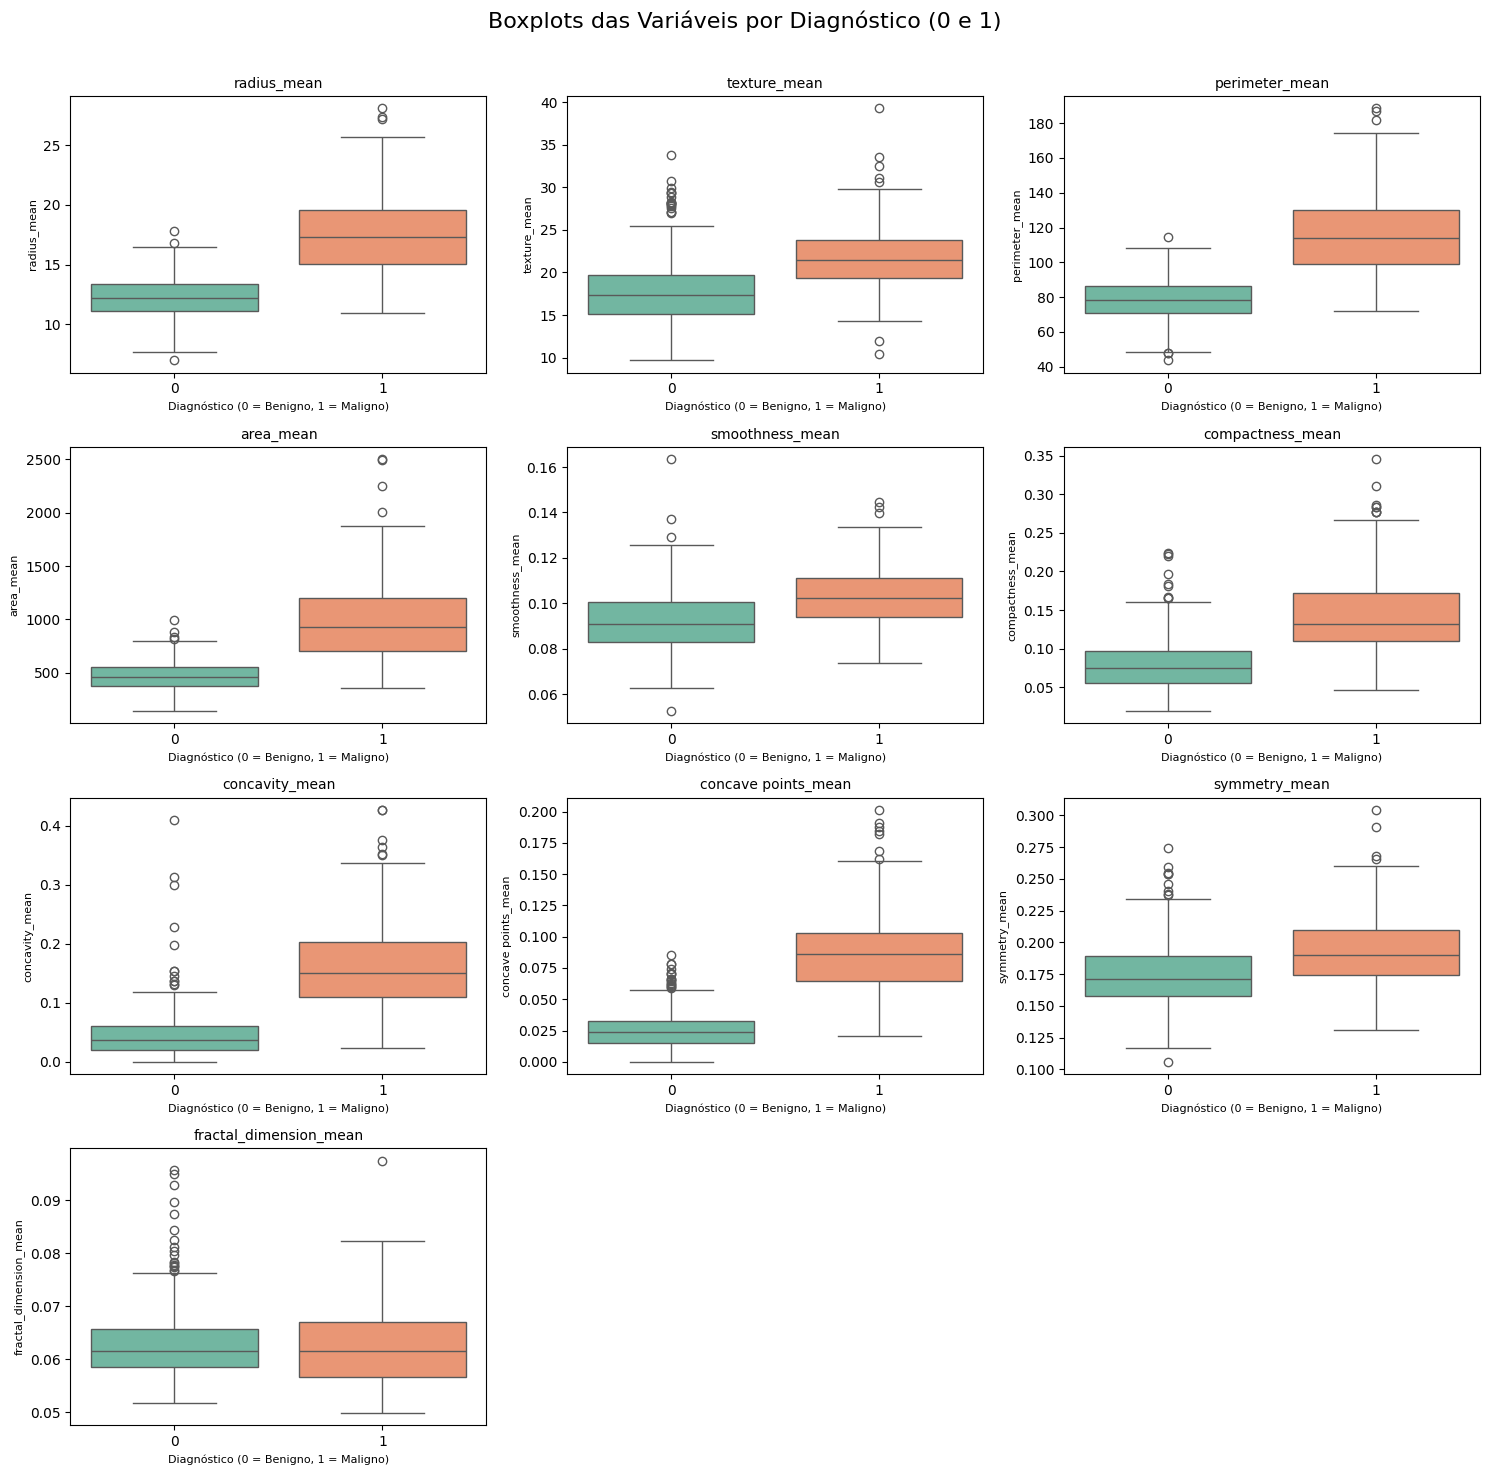

In [232]:
# Define o layout da figura
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# Cria um boxplot para cada variável
for i, col in enumerate(features):
    sns.boxplot(data=df, x='diagnosis', y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('Diagnóstico (0 = Benigno, 1 = Maligno)', fontsize=8)
    axes[i].set_ylabel(col, fontsize=8)

# Remove eixos extras se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Boxplots das Variáveis por Diagnóstico (0 e 1)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Gráfico de correlação
- Indicando as váriaveis com maior peso no modelo


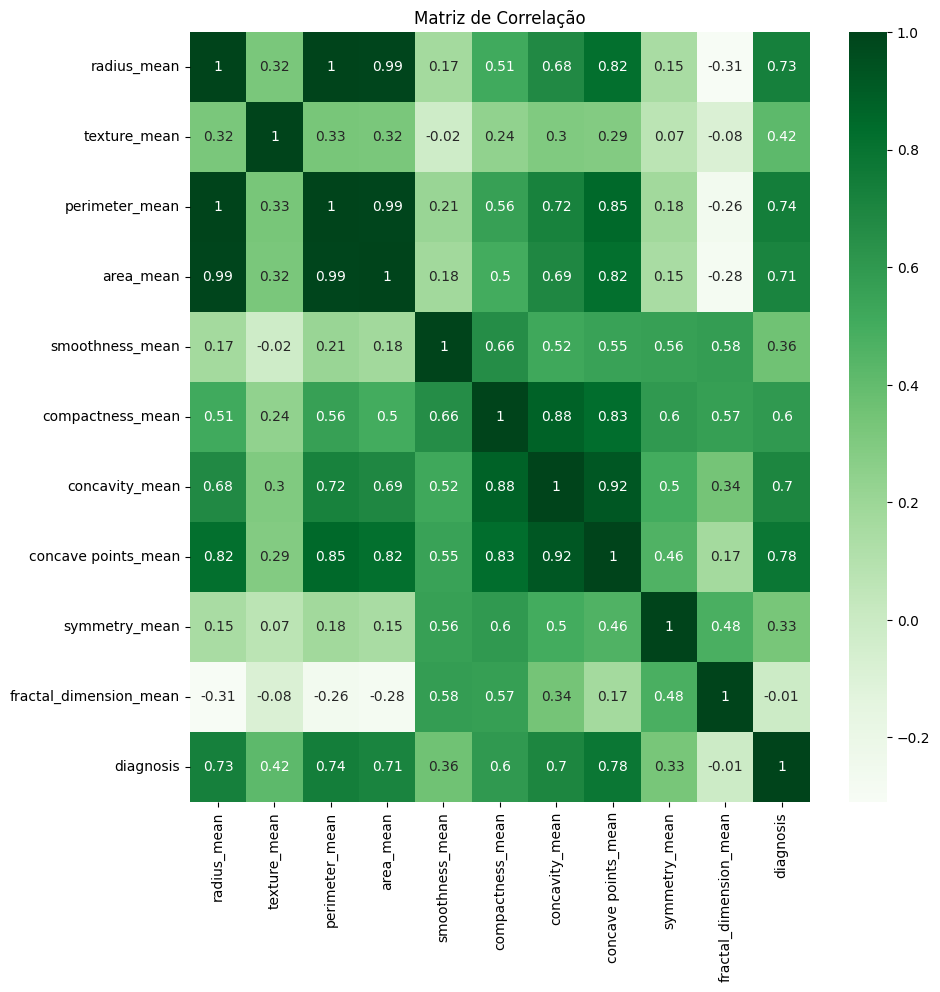

In [233]:
df_novo = features.copy()
df_novo['diagnosis'] = df['diagnosis']
df_corr = df_novo.corr().round(2)
fig, ax = plt.subplots(figsize =((10,10)))
sns.heatmap(data=df_corr, annot=True, cmap='Greens', ax=ax)
plt.title('Matriz de Correlação')
plt.show()

# Correlação não é causalidade

In [234]:
print(df_corr['diagnosis'].sort_values(ascending=False))

diagnosis                 1.00
concave points_mean       0.78
perimeter_mean            0.74
radius_mean               0.73
area_mean                 0.71
concavity_mean            0.70
compactness_mean          0.60
texture_mean              0.42
smoothness_mean           0.36
symmetry_mean             0.33
fractal_dimension_mean   -0.01
Name: diagnosis, dtype: float64


## Separação de treino e teste
- Definindo as colunas chave que vão ser utilizadas para treinamento do modelo

In [235]:
# x = df.drop('diagnosis', axis=1)
x = df[['concave points_mean','perimeter_mean','radius_mean','area_mean','concavity_mean']]
y = df['diagnosis']

In [236]:
# ============== Treinando dados ==============

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)
print("SHAPES DOS DADOS DE TREINO E TESTE")
print('===================================')
print(f'Treino (x): [{x_train.shape}]')
print(f'Teste (x): [{x_test.shape}]')
print('===================================')
print(f'Treino (y): [{y_train.shape}]')
print(f'Teste (y): [{y_test.shape}]')
print('===================================')


SHAPES DOS DADOS DE TREINO E TESTE
Treino (x): [(398, 5)]
Teste (x): [(171, 5)]
Treino (y): [(398,)]
Teste (y): [(171,)]


## Padronizando dados

In [237]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)
x_train_escalonado

array([[ 2.84839268,  2.12129465,  1.70581999,  1.66933676,  3.53913939],
       [ 0.55700173,  0.5690952 ,  0.53638811,  0.39031555,  0.39354254],
       [-0.60664497, -0.14884823, -0.13145612, -0.21154347, -0.56752982],
       ...,
       [-0.78717571, -0.38065427, -0.31743806, -0.38253259, -0.94290438],
       [-0.45717875,  0.02070601,  0.02071092, -0.10453373, -0.46711744],
       [ 1.68983853,  1.57659141,  1.59592158,  1.51929664,  2.04775641]],
      shape=(398, 5))

## Treinamento dos modelos

- KNN, SVM e Random Forest

Text(0, 0.5, 'Erro médio')

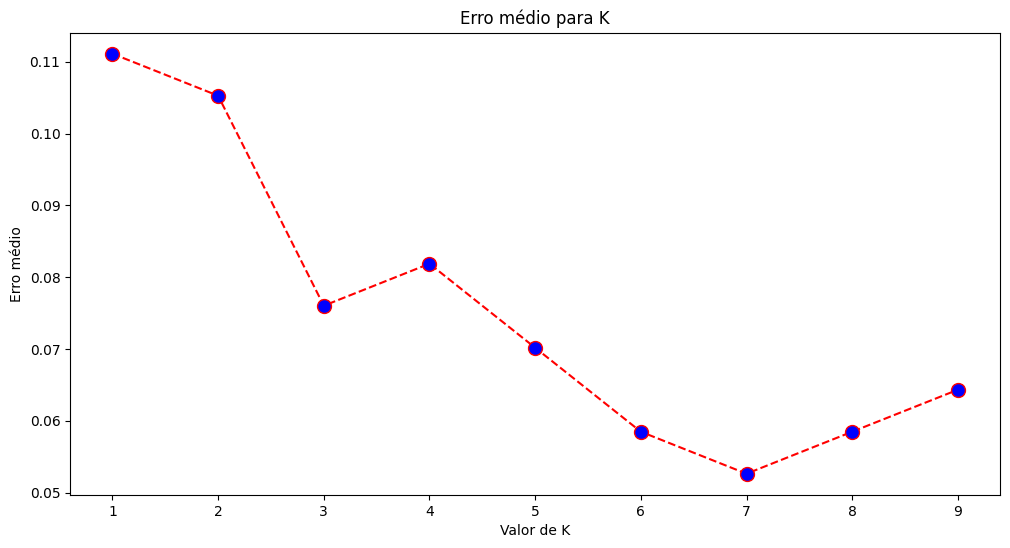

In [238]:
# Definindo um erro médio para K, para utilizar na variação do treinamento

from sklearn.neighbors import KNeighborsClassifier
import numpy as np

error = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test_escalonado)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,10), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title("Erro médio para K")
plt.xlabel("Valor de K")
plt.ylabel("Erro médio")

## Observações

- Quanto menor erro ímpar, é sempre o melhor caminho

In [239]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Gridsearch
param_grid = {'n_neighbors': [3,5,7,9], 
               'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']}

gs_metric = make_scorer(accuracy_score, greater_is_better=True)

grid = GridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid=param_grid,
                    scoring=gs_metric,
                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                    n_jobs=4,
                    verbose=3)

grid.fit(x_train_escalonado, y_train)
knn_params = grid.best_params_
print(f'Melhores parâmetros KNN: {knn_params}')
# grid.cv_results_


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Melhores parâmetros KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


In [240]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=knn_params['n_neighbors'],
                                            weights=knn_params['weights'],
                                            metric=knn_params['metric'])

knn.fit(x_train_escalonado, y_train)
y_predito = knn.predict(x_test_escalonado)

print(classification_report(y_test, y_predito))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.93      0.89      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



Text(70.72222222222221, 0.5, 'Dados reais')

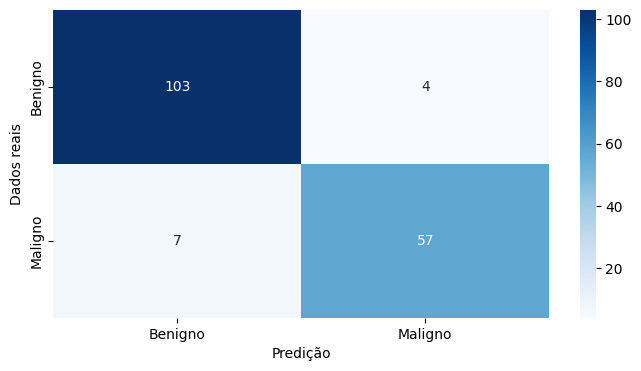

In [241]:
# Analisando resultados, matriz de confusao
from sklearn.metrics import confusion_matrix

matriz_confusao_knn = confusion_matrix(y_test, y_predito)
plt.figure(figsize=(8,4))
sns.heatmap(matriz_confusao_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predição')
plt.ylabel('Dados reais')



In [242]:
# ==== SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)

svm.fit(x_train_escalonado, y_train)
y_predito_svm = svm.predict(x_test_escalonado)

print(classification_report(y_test, y_predito_svm))


              precision    recall  f1-score   support

           0       0.90      0.95      0.93       107
           1       0.91      0.83      0.87        64

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



Text(70.72222222222221, 0.5, 'Dados reais')

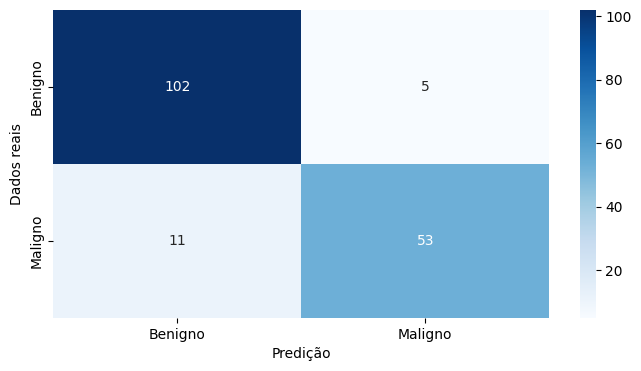

In [243]:
# Matriz de confusão SVM
matriz_confusao_svm = confusion_matrix(y_test, y_predito_svm)
plt.figure(figsize=(8,4))
sns.heatmap(matriz_confusao_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predição')
plt.ylabel('Dados reais')

In [244]:
# ==== Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(x_train_escalonado, y_train)
estimator = rf.estimators_
y_predito_rf = rf.predict(x_test_escalonado)

print(classification_report(y_test, y_predito_rf))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       107
           1       0.89      0.86      0.87        64

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



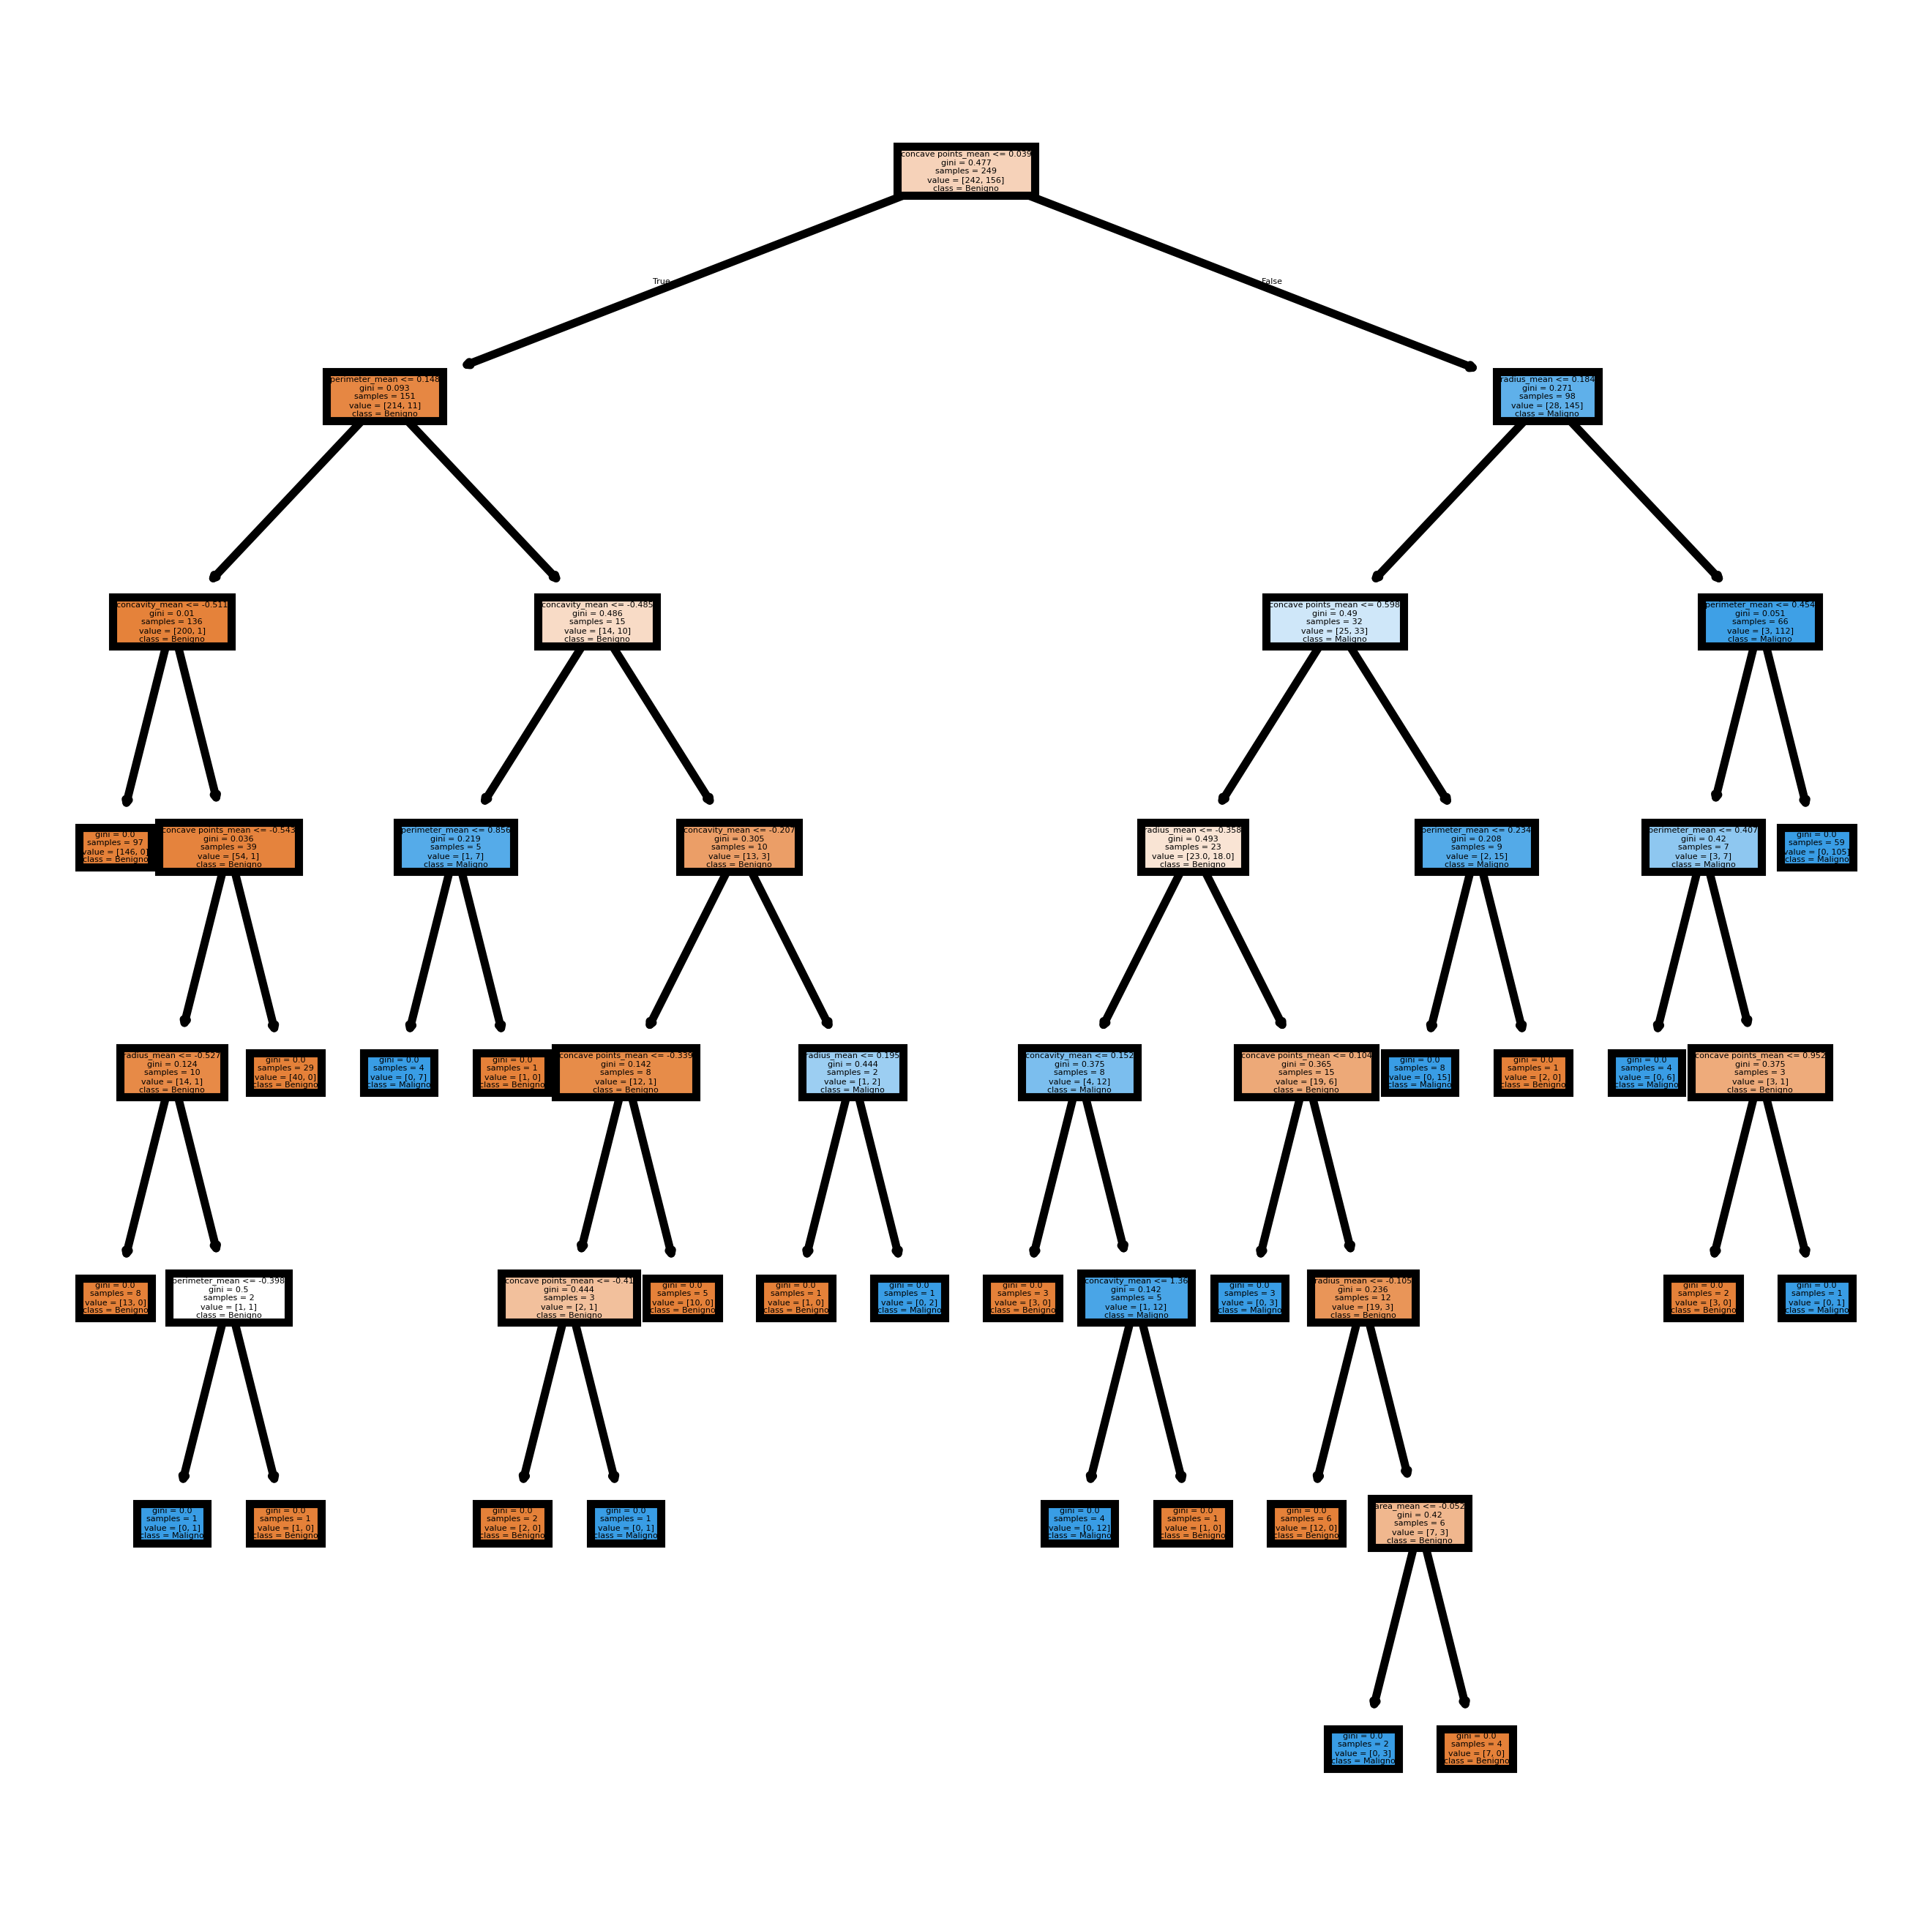

In [245]:
from sklearn import tree

label_names = x.columns.tolist()
class_names = ['Benigno', 'Maligno']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = label_names,
               class_names=class_names,
               filled=True);

fig.savefig('./data/random_forest_tree_plot.png')


Text(70.72222222222221, 0.5, 'Dados reais')

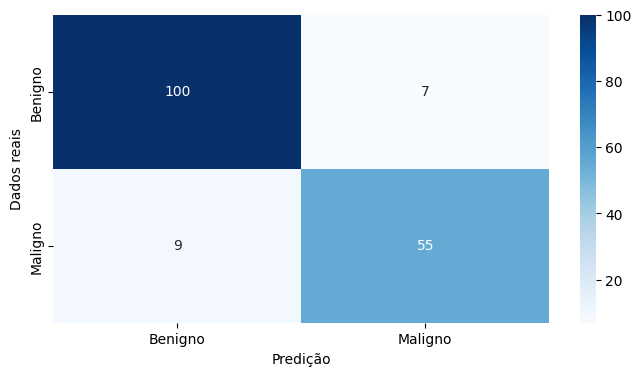

In [246]:
# Matriz de confusão Random Forest
matriz_confusao_rf = confusion_matrix(y_test, y_predito_rf)
plt.figure(figsize=(8,4))
sns.heatmap(matriz_confusao_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predição')
plt.ylabel('Dados reais')

In [247]:
from sklearn.metrics import roc_curve, auc

y_prob_knn = knn.predict_proba(x_test_escalonado)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(false_positive_rate, true_positive_rate)
print(f'Área sob a curva (AUC) K-NEIGHBORS: {roc_auc_knn:.2f}')

y_prob_svm = svm.predict_proba(x_test_escalonado)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(false_positive_rate, true_positive_rate)
print(f'Área sob a curva (AUC) SUPORT VETOR MACHINE: {roc_auc_svm:.2f}')

y_prob_rf = rf.predict_proba(x_test_escalonado)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(false_positive_rate, true_positive_rate)
print(f'Área sob a curva (AUC) RANDOM FOREST: {roc_auc_rf:.2f}')

# plt.figure(figsize=(10,10))
# plt.title('Receiver Operating Characteristic (ROC) Curve - KNN Classifier')
# plt.plot(false_positive_rate, true_positive_rate, color='red', label=f'AUC = {roc_auc:.2f}')
# plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], linestyle='--')
# plt.axis('tight')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

Área sob a curva (AUC) K-NEIGHBORS: 0.98
Área sob a curva (AUC) SUPORT VETOR MACHINE: 0.98
Área sob a curva (AUC) RANDOM FOREST: 0.97


# Intepretação dos resultados 
* Utilizando SHAP e Feature Importance

              Variável  Importância
0  concave points_mean     0.328158
3            area_mean     0.206303
1       perimeter_mean     0.184871
2          radius_mean     0.168787
4       concavity_mean     0.111881


C:\Users\charl\AppData\Local\Temp\ipykernel_2220\2153385299.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Variável', data=feat_imp, palette='Greens_r')


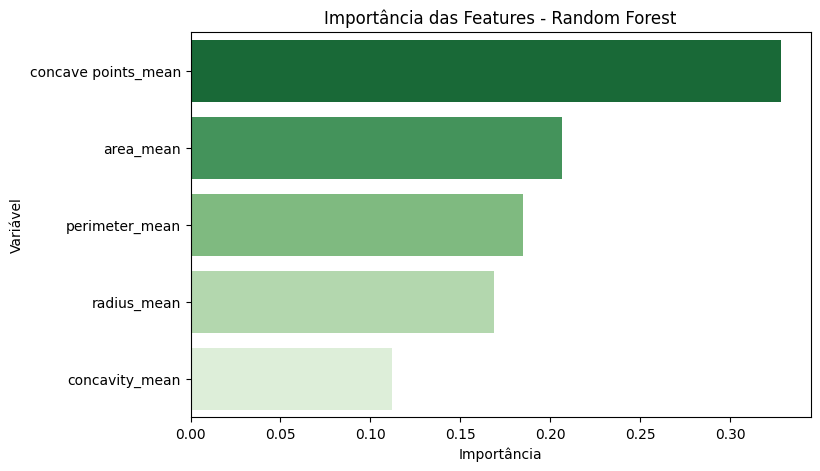

In [248]:
# Importância das features no Random Forest
importances = rf.feature_importances_
feature_names = x.columns

# Organiza em DataFrame
feat_imp = pd.DataFrame({
    'Variável': feature_names,
    'Importância': importances
}).sort_values(by='Importância', ascending=False)

# Exibe tabela e gráfico
print(feat_imp)

plt.figure(figsize=(8,5))
sns.barplot(x='Importância', y='Variável', data=feat_imp, palette='Greens_r')
plt.title('Importância das Features - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.savefig('./data/feature_importance_random_forest.png')
plt.show()

100%|██████████| 171/171 [00:01<00:00, 145.14it/s]


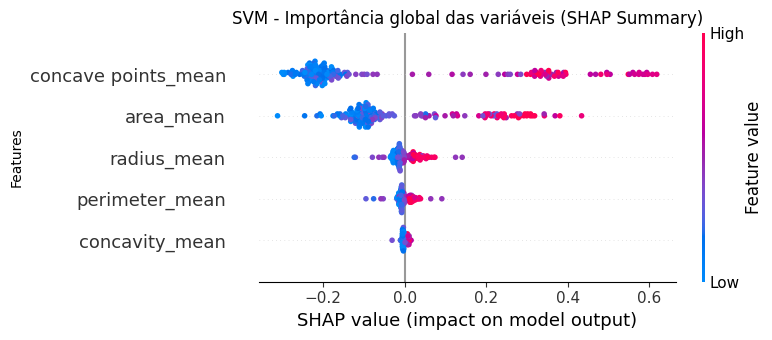

In [249]:
import shap

x_train_sample = shap.sample(x_train_escalonado, 100) # reduz para 100 para ficar rápido

# Inicializa o explicador SHAP com o modelo SVM treinado
explainer = shap.KernelExplainer(svm.predict, x_train_sample)

# Calcula os valores SHAP para o conjunto de teste
shap_values = explainer.shap_values(x_test_escalonado)

# === Gráfico importância global das variáveis ===
plt.title("SVM - Importância global das variáveis (SHAP Summary)")
plt.ylabel("Features")
plt.savefig('./data/shap_summary_svm.png')
shap.summary_plot(shap_values, features=x_test_escalonado, feature_names=x.columns)




# Concave points mean

- Se trata da média dos pontos concâvos de uma massa tumoral:
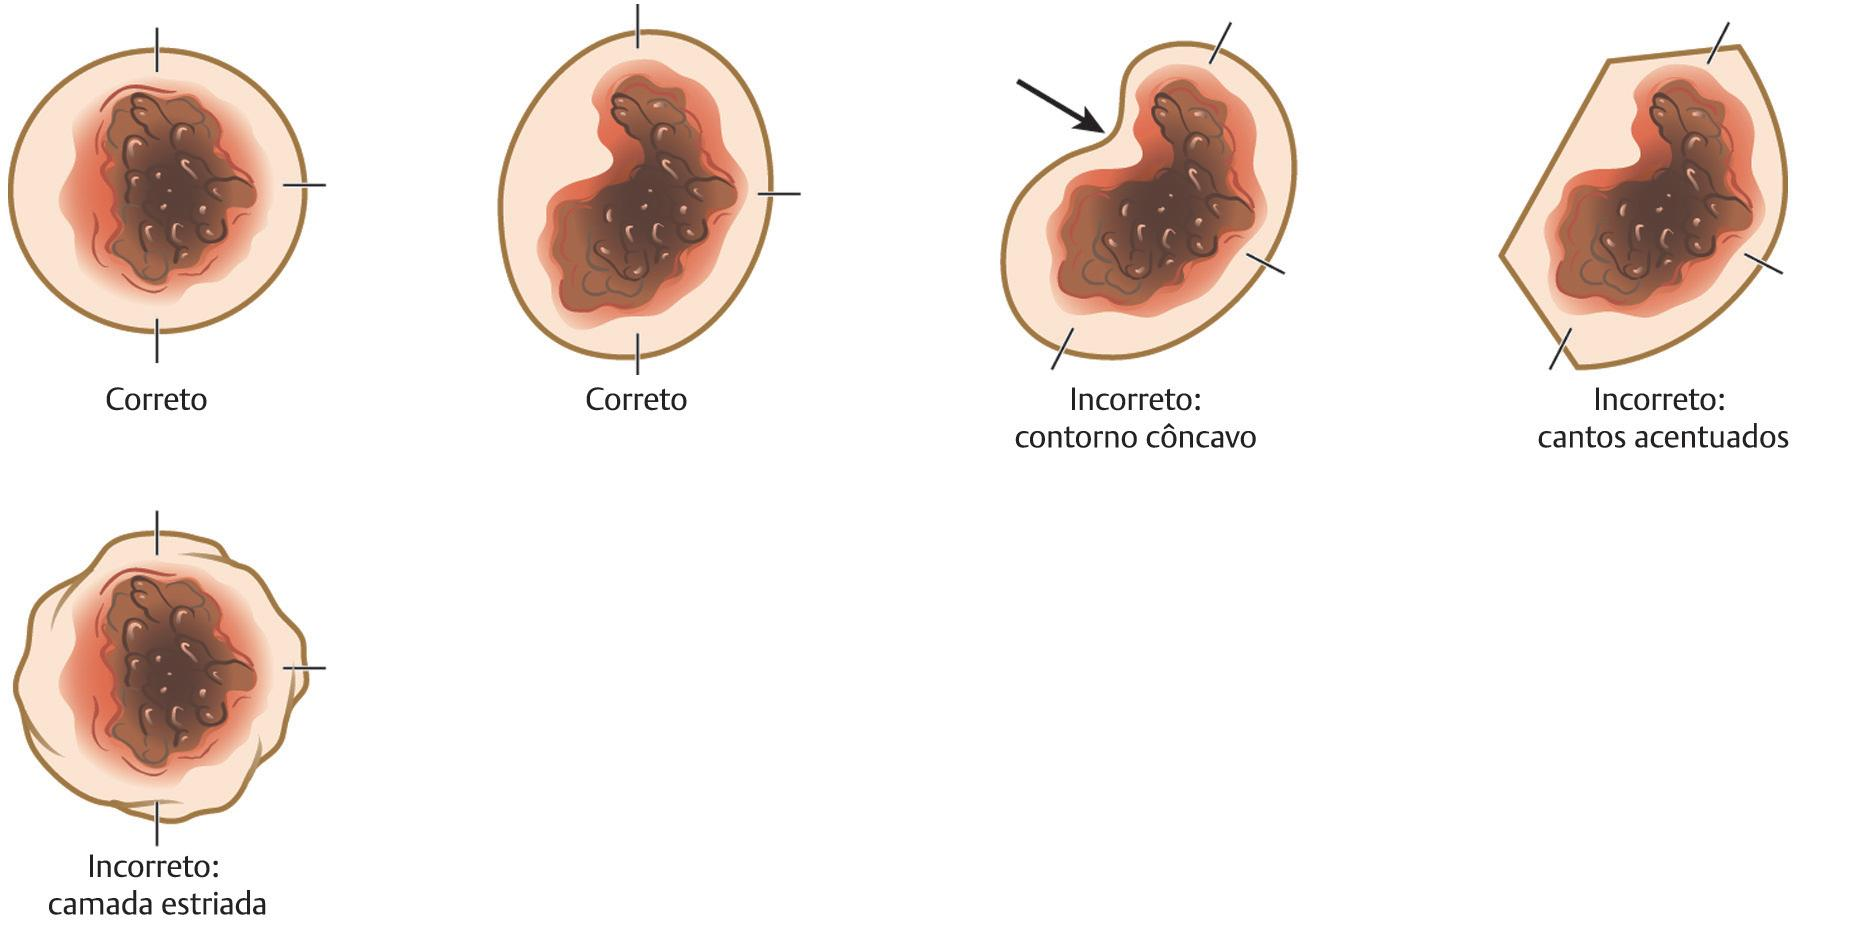

In [250]:
# ==== Relatório
# Adaptação do código para múltiplos modelos e resultados

from sklearn.model_selection import KFold, cross_validate


def aplica_validacao_cruzada(x_axis, y_axis):
    
    # K-Fold - não gerar overfitting
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    x = x_axis
    y = y_axis
    
    modelos = {
        "KNN": knn,
        "SVM": svm,
        "RF": rf
    }
    
    resultados = {}
    
    for nome, modelo in modelos.items():
        scores = cross_validate(
            modelo, x, y, cv=cv,
            scoring=['accuracy', 'precision', 'recall', 'f1'],
            n_jobs=-1
        )
        
        resultados[nome] = {
            'F1Score': scores['test_f1'].mean(),
            'Precisao': scores['test_precision'].mean(),
            'Recall': scores['test_recall'].mean(),
            'Acuracia' : scores['test_accuracy'].mean()
        }
    
    print("===== RELATÓRIO GERAL COM VALIDAÇÃO CRUZADA E KFOLD =====")
    for nome, metricas in resultados.items():
        print(f"\n{nome}:")
        print(f"  F1-Score médio : {metricas['F1Score']:.2f}")
        print(f"  Precisão média : {metricas['Precisao']:.2f}")
        print(f"  Recall médio   : {metricas['Recall']:.2f}")
        print(f"  Acurácia média : {metricas['Acuracia']:.2f}")
    
    # Select best model
    melhorModelo = max(resultados, key=lambda m: resultados[m]['F1Score'])
    
    print("\n=================================================")
    print(f"Melhor Modelo: [{melhorModelo}]  F1-Score: [{resultados[melhorModelo]['F1Score']:.2f}]")
    print("=================================================\n")
    
    return resultados, melhorModelo


# Executa a validação cruzada
resultados, melhorModelo = aplica_validacao_cruzada(x, y)

# Métricas complementares
print(f'Área sob a curva (AUC) KNN: {roc_auc_knn:.2f}')
print(f'Área sob a curva (AUC) SVM: {roc_auc_svm:.2f}')
print(f'Área sob a curva (AUC) Random Forest: {roc_auc_rf:.2f}')

===== RELATÓRIO GERAL COM VALIDAÇÃO CRUZADA E KFOLD =====

KNN:
  F1-Score médio : 0.82
  Precisão média : 0.91
  Recall médio   : 0.75
  Acurácia média : 0.88

SVM:
  F1-Score médio : 0.84
  Precisão média : 0.91
  Recall médio   : 0.79
  Acurácia média : 0.89

RF:
  F1-Score médio : 0.89
  Precisão média : 0.91
  Recall médio   : 0.88
  Acurácia média : 0.92

Melhor Modelo: [RF]  F1-Score: [0.89]

Área sob a curva (AUC) KNN: 0.98
Área sob a curva (AUC) SVM: 0.98
Área sob a curva (AUC) Random Forest: 0.97
